In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [3]:
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot

In [4]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

In [5]:
selected_col = ['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'company_type_Pvt Ltd']

X_train = X_train[selected_col] 
X_test = X_test[selected_col]

# Tunning Model

In [6]:
param = []

for criterion in ('gini', 'entropy'):
    for splitter in ('best', 'random'):
        for max_depth in range (1,20):
            model = tree.DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
            result = training(X_train, X_test, Y_train, Y_test, model)
            print(criterion,splitter, max_depth)
            print(result['test_score'])
            print(result['train_score'])
            print()
            param.append((result['test_score'],result['train_score'],criterion,splitter, max_depth))

gini best 1
0.6495406016544066
0.6653279761039553

gini best 2
0.7335042361965824
0.7408936683536562

gini best 3
0.7618109024816098
0.7692763091632777

gini best 4
0.7678213641697913
0.7841823254422502

gini best 5
0.7751091249964223
0.8006780967293364

gini best 6
0.7769594198128059
0.8097855876969672

gini best 7
0.7773225734894238
0.819356727226184

gini best 8
0.7687165469273263
0.8326880539628309

gini best 9
0.7597740218106878
0.8490517197326283

gini best 10
0.7502783581875949
0.8679228318287628

gini best 11
0.7384375805020467
0.8865862141096688

gini best 12
0.7198267595958439
0.9060453248250344

gini best 13
0.7029655165011306
0.9247873010938762

gini best 14
0.6834265964450296
0.9429267272625058

gini best 15
0.6674972092623865
0.9573826641787975

gini best 16
0.659216768755188
0.9705478367601614

gini best 17
0.655136388356184
0.9797315002761926

gini best 18
0.6405635501044737
0.9862302328010804

gini best 19
0.6383091350144545
0.9913177800616978

gini random 1
0.62720611

In [7]:
param.sort()
param[::-1]

[(0.7794240346910153, 0.8095470416370869, 'entropy', 'best', 6),
 (0.7792739430975757, 0.8185246086673876, 'entropy', 'best', 7),
 (0.7773225734894238, 0.819356727226184, 'gini', 'best', 7),
 (0.7769594198128059, 0.8097855876969672, 'gini', 'best', 6),
 (0.7757143214929731, 0.7995866442806865, 'entropy', 'best', 5),
 (0.7751091249964223, 0.8006780967293364, 'gini', 'best', 5),
 (0.7746939133297077, 0.8438246998391549, 'entropy', 'best', 9),
 (0.7734953273034321, 0.8299097490650786, 'entropy', 'best', 8),
 (0.7687165469273263, 0.8326880539628309, 'gini', 'best', 8),
 (0.7686233434467756, 0.8601469155897371, 'entropy', 'best', 10),
 (0.7678213641697913, 0.7841823254422502, 'gini', 'best', 4),
 (0.7678213641697913, 0.7841823254422502, 'entropy', 'best', 4),
 (0.7659048787818074, 0.7776029429901987, 'gini', 'random', 5),
 (0.7637052050834359, 0.8099658250359624, 'entropy', 'random', 8),
 (0.7631712081747145, 0.8443294329196487, 'entropy', 'random', 10),
 (0.7618109024816098, 0.769276309163

# Importance feature

test_score:  0.7794240346910153
train_score:  0.8095470416370869
city_development_index
Feature: 0, Score: 0.49536
gender
Feature: 1, Score: 0.00093
relevent_experience
Feature: 2, Score: 0.00840
enrolled_university
Feature: 3, Score: 0.00699
education_level
Feature: 4, Score: 0.05847
experience
Feature: 5, Score: 0.02940
company_size
Feature: 6, Score: 0.19156
last_new_job
Feature: 7, Score: 0.02376
training_hours
Feature: 8, Score: 0.02606
company_type_Pvt Ltd
Feature: 9, Score: 0.15910


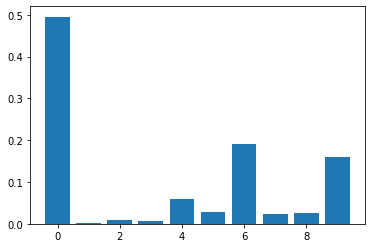

In [8]:
model = tree.DecisionTreeClassifier(criterion ='entropy', max_depth = 6)
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])
importance = model.feature_importances_

for i,v in enumerate(importance):
    print(X_train.columns[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Scoring Model

In [9]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')[selected_col]
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.784047564749231


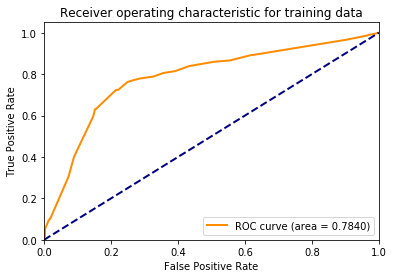

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()

[Text(159.84375, 201.90857142857143, 'X[0] <= 0.625\nentropy = 0.808\nsamples = 15326\nvalue = [11529, 3797]'),
 Text(82.15, 170.84571428571428, 'X[5] <= 1.5\nentropy = 0.976\nsamples = 2755\nvalue = [1128, 1627]'),
 Text(44.95, 139.78285714285715, 'X[2] <= 0.5\nentropy = 0.92\nsamples = 358\nvalue = [120, 238]'),
 Text(24.8, 108.72, 'X[8] <= 55.5\nentropy = 0.971\nsamples = 200\nvalue = [80, 120]'),
 Text(12.4, 77.65714285714284, 'X[8] <= 30.5\nentropy = 0.991\nsamples = 119\nvalue = [53, 66]'),
 Text(6.2, 46.59428571428572, 'X[7] <= 4.0\nentropy = 0.928\nsamples = 70\nvalue = [24, 46]'),
 Text(3.1, 15.531428571428563, 'entropy = 0.908\nsamples = 68\nvalue = [22, 46]'),
 Text(9.3, 15.531428571428563, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(18.6, 46.59428571428572, 'X[7] <= 2.0\nentropy = 0.976\nsamples = 49\nvalue = [29, 20]'),
 Text(15.5, 15.531428571428563, 'entropy = 0.994\nsamples = 44\nvalue = [24, 20]'),
 Text(21.7, 15.531428571428563, 'entropy = 0.0\nsamples = 5\nv

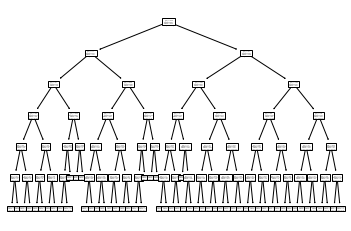

In [11]:
tree.plot_tree(model) 